# Phase 1: Inputs

In [3]:
import networkx as nx
from parse import validate_file, read_input_file, read_output_file, write_input_file, write_output_file
from utils import is_valid_solution, calculate_happiness, convert_dictionary
import sys
import random
import numpy as np

### 1. Test Run: Generate Input for Maximal Independent Sets

In [130]:
edgeList = list(G.edges)
nodeList = list(G.nodes)
m = G.number_of_edges() - 1
selected_nodes = []
n = G.number_of_nodes()
n_small = int(2 * np.log(n))
for i in range(n_small):
    while(True):
        k = random.randint(0, n - 1)
        if k not in selected_nodes:
            break
    selected_nodes.append(k)

selected_nodes.sort()
print("selected_nodes: ", selected_nodes)

for i in range(n_small):
    node = selected_nodes.pop(0);
    print("current node: ", node)
    for other_node in selected_nodes:
        e = (node, other_node)
        if e in edgeList:
            print("removing: ", e)
            edgeList.remove(e)
            G.remove_edge(*e)

selected_nodes:  [0, 2, 5]
current node:  0
removing:  (0, 2)
removing:  (0, 5)
current node:  2
removing:  (2, 5)
current node:  5


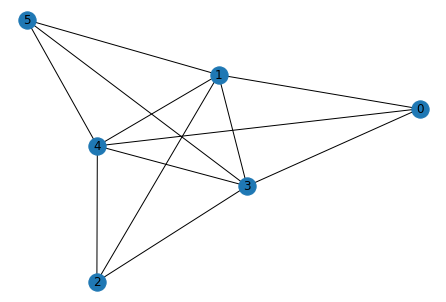

In [131]:
nx.draw(G, with_labels=True)

Randomize that s1,4 + s1,5 + s2,5 < Smax/k 

In [ ]:
Smax = 20
H = G.copy()
edgeList = list(H.edges)
nodeList = list(H.nodes)
n = G.number_of_nodes()
selected = [0, 2, 5]
others = list(set(nodeList) - set(selected))
print("others: ", others)

for i in range(len(selected)):
    node = selected.pop(0);
    print("current node: ", node)
    for other_node in selected:
        e = (node, other_node)

### 2. Create a Graph with weight randomly assigned

***Hint***: if you create a random unweighted undirected graph, and then you pick a small set (2logn) of nodes at random, and force it to be an independent set by removing all edges among them, this is still likely to be a hard input to the independent set problem.

In [5]:
def generate_solution(selected, n_nodes): 
    others = list(set(range(n_nodes)) - set(selected))
    n_rooms = len(others) + 1
    room_assignments = {}
    room_assignments[0] = selected
    for i in range(n_rooms - 1): 
        room_assignments[i + 1] = [others[i]]
    return convert_dictionary(room_assignments)

**Note:** To prevent rounidng errors, we generate integers first before dividing them by 1000 (for 3 decimal places)

In [2]:
def create_input_graph(n_nodes, Smax):
    Smax = int(Smax * 1000)
    G = nx.complete_graph(n_nodes)
    edgeList = list(G.edges)
    nodeList = list(G.nodes)
    m = G.number_of_edges() - 1
    selected = []
    n = n_nodes
    n_small = int(2 * np.log(n))
    for i in range(n_small):
        while(True):
            k = random.randint(0, n - 1)
            if k not in selected:
                break
        selected.append(k)

    selected.sort()
    selected_copy = selected.copy()
    # others = list(set(nodeList) - set(selected))
    print("selected: ", selected)
    # print("others: ", others)

    k = n_nodes - n_small + 1 #if we assign the selected nodes in one room, and everyone else in their own room
    print("k: ", k)
    Sroom = Smax // k
    S_selected = Sroom

    print("assigning values for selected nodes")
    for i in range(n_small):
        node = selected.pop(0);
        print("current node: ", node)
        for other_node in selected:
            e = (node, other_node)
            edgeList.remove(e)
            happiness = random.randint(0, 99999)
            if S_selected > 0:
                stress = random.randint(0, S_selected)
            else:
                stress = 0
            G.add_edge(node, other_node, happiness=happiness / 1000, stress=stress / 1000)
            # print("edge: {}, h:{}, s:{}".format(e,happiness,stress))
            S_selected -= stress

    print("assigning values for other nodes")
    for i in range(len(edgeList)):
        e = edgeList.pop(0);
        happiness = random.randint(0, 99999)
        stress = random.randint(0, Sroom)
        G.add_edge(e[0], e[1], happiness=happiness / 1000, stress=stress / 1000)
        # print("edge: {}, h:{}, s:{}".format(e,happiness,stress))
    return G, generate_solution(selected_copy, n_nodes), k

{(0,
  1): Text(0.7499999888241293, 0.433012741974907, "{'happiness': 3.691, 'stress': 3.093}"),
 (0,
  2): Text(0.24999998137354879, 0.4330127121725851, "{'happiness': 25.089, 'stress': 7.8}"),
 (0,
  3): Text(1.4901160971803051e-08, -1.9206817775722963e-08, "{'happiness': 72.377, 'stress': 0.041}"),
 (0,
  4): Text(0.25000005587935364, -0.43301269296576733, "{'happiness': 9.087, 'stress': 7.334}"),
 (0,
  5): Text(0.7499999590218074, -0.43301269296576733, "{'happiness': 49.284, 'stress': 0.831}"),
 (1,
  2): Text(-2.9802321943606103e-08, 0.8660254296429223, "{'happiness': 95.552, 'stress': 11.341}"),
 (1,
  3): Text(-0.24999999627470976, 0.4330126982635194, "{'happiness': 90.861, 'stress': 9.271}"),
 (1,
  4): Text(4.4703482915409154e-08, 2.4504569873240456e-08, "{'happiness': 53.875, 'stress': 10.084}"),
 (1,
  5): Text(0.4999999478459366, 2.4504569873240456e-08, "{'happiness': 91.083, 'stress': 1.707}"),
 (2,
  3): Text(-0.7500000037252903, 0.43301266846119746, "{'happiness': 32.42

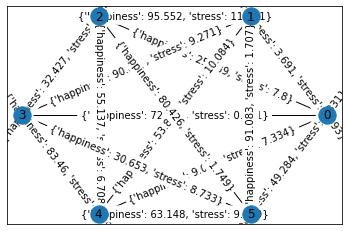

In [173]:
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos)
nx.draw_networkx_edge_labels(G, pos)

{(0, 1): Text(0.7499999888241293, 0.433012741974907, '3.691'),
 (0, 2): Text(0.24999998137354879, 0.4330127121725851, '25.089'),
 (0, 3): Text(1.4901160971803051e-08, -1.9206817775722963e-08, '72.377'),
 (0, 4): Text(0.25000005587935364, -0.43301269296576733, '9.087'),
 (0, 5): Text(0.7499999590218074, -0.43301269296576733, '49.284'),
 (1, 2): Text(-2.9802321943606103e-08, 0.8660254296429223, '95.552'),
 (1, 3): Text(-0.24999999627470976, 0.4330126982635194, '90.861'),
 (1, 4): Text(4.4703482915409154e-08, 2.4504569873240456e-08, '53.875'),
 (1, 5): Text(0.4999999478459366, 2.4504569873240456e-08, '91.083'),
 (2, 3): Text(-0.7500000037252903, 0.43301266846119746, '32.427'),
 (2, 4): Text(-0.49999996274709757, -5.297752070365647e-09, '55.137'),
 (2, 5): Text(-5.9604643887212205e-08, -5.297752070365647e-09, '80.426'),
 (3, 4): Text(-0.7499999292194854, -0.43301273667715495, '83.46'),
 (3, 5): Text(-0.2500000260770317, -0.43301273667715495, '30.653'),
 (4, 5): Text(1.4901160971803051e-08,

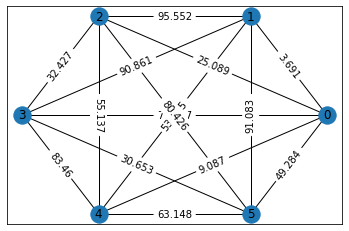

In [175]:
# show happiness
labels = nx.get_edge_attributes(G,'happiness')
nx.draw_networkx(G, pos)
nx.draw_networkx_edge_labels(G,pos, edge_labels=labels)

{(0, 1): Text(0.5828137844800949, 0.7701087892055511, '3.093'),
 (0, 2): Text(0.4010586589574814, 0.43700727075338364, '7.8'),
 (0, 3): Text(0.1687605008482933, 0.5447055250406265, '0.041'),
 (0, 4): Text(0.4814029186964035, 0.5628246068954468, '7.334'),
 (0, 5): Text(0.24900518357753754, 0.6297840476036072, '0.831'),
 (1, 2): Text(0.7175254225730896, 0.4580424353480339, '11.341'),
 (1, 3): Text(0.4852272644639015, 0.5657406896352768, '9.271'),
 (1, 4): Text(0.7978696823120117, 0.583859771490097, '10.084'),
 (1, 5): Text(0.5654719471931458, 0.6508192121982574, '1.707'),
 (2, 3): Text(0.303472138941288, 0.23263917118310928, '3.242'),
 (2, 4): Text(0.6161145567893982, 0.25075825303792953, '6.708'),
 (2, 5): Text(0.3837168216705322, 0.31771769374608994, '1.749'),
 (3, 4): Text(0.3838163986802101, 0.3584565073251724, '3.894'),
 (3, 5): Text(0.15141866356134415, 0.4254159480333328, '8.733'),
 (4, 5): Text(0.46406108140945435, 0.4435350298881531, '9.019')}

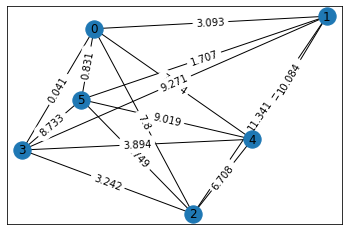

In [177]:
# show stress
pos = nx.random_layout(G)
labels = nx.get_edge_attributes(G,'stress')
nx.draw_networkx(G, pos)
nx.draw_networkx_edge_labels(G,pos, edge_labels=labels)

### 3. Test G and Solution - Using parse.py

In [181]:
D = convert_dictionary({0: [0, 2, 3], 1: [1], 2: [4], 3:[5]})
D

{0: 0, 2: 0, 3: 0, 1: 1, 4: 2, 5: 3}

In [182]:
is_valid_solution(D, G, 50, 4)

True

In [218]:
is_valid_solution({1: 0, 5: 0, 6: 0, 8: 0, 0: 1, 2: 2, 3: 3, 4: 4, 7: 5, 9: 6}, G10, 100, k)

False

In [222]:
G10, D10, k10 = create_input_graph(10, 100)
is_valid_solution(D10, G10, 100, k10)

selected:  [0, 3, 6, 8]
k:  7
assigning values for selected nodes
current node:  0
edge: (0, 3), h:37.257, s:11.647
edge: (0, 6), h:8.047, s:1.028
edge: (0, 8), h:69.704, s:1.486
current node:  3
edge: (3, 6), h:19.076, s:0.076
edge: (3, 8), h:19.296, s:0.018
current node:  6
edge: (6, 8), h:69.247, s:0.001
current node:  8
assigning values for other nodes
edge: (0, 1), h:3.557, s:3.888
edge: (0, 2), h:97.737, s:1.922
edge: (0, 4), h:66.705, s:8.71
edge: (0, 5), h:24.204, s:12.372
edge: (0, 7), h:25.08, s:8.831
edge: (0, 9), h:50.935, s:13.76
edge: (1, 2), h:92.535, s:2.642
edge: (1, 3), h:39.204, s:7.034
edge: (1, 4), h:38.494, s:13.587
edge: (1, 5), h:77.139, s:14.256
edge: (1, 6), h:6.007, s:12.458
edge: (1, 7), h:42.032, s:8.994
edge: (1, 8), h:34.058, s:11.048
edge: (1, 9), h:18.172, s:4.299
edge: (2, 3), h:50.744, s:7.679
edge: (2, 4), h:78.766, s:7.981
edge: (2, 5), h:74.428, s:7.511
edge: (2, 6), h:80.31, s:10.506
edge: (2, 7), h:77.07, s:6.017
edge: (2, 8), h:87.157, s:2.346
e

True

In [16]:
G20, D20, k20 = create_input_graph(20, 100)
is_valid_solution(D20, G20, 100, k20)

selected:  [0, 2, 6, 17, 19]
k:  16
assigning values for selected nodes
current node:  0
edge: (0, 2), h:35.253, s:1.046
edge: (0, 6), h:57.168, s:0.492
edge: (0, 17), h:56.963, s:0.708
edge: (0, 19), h:23.622, s:2.797
current node:  2
edge: (2, 6), h:3.445, s:0.63
edge: (2, 17), h:82.726, s:0.139
edge: (2, 19), h:26.086, s:0.088
current node:  6
edge: (6, 17), h:38.557, s:0.006
edge: (6, 19), h:97.425, s:0.135
current node:  17
edge: (17, 19), h:85.118, s:0.195
current node:  19
assigning values for other nodes
edge: (0, 1), h:95.592, s:0.054
edge: (0, 3), h:30.038, s:3.388
edge: (0, 4), h:97.888, s:1.962
edge: (0, 5), h:1.546, s:5.895
edge: (0, 7), h:73.9, s:6.164
edge: (0, 8), h:57.727, s:1.814
edge: (0, 9), h:44.347, s:1.241
edge: (0, 10), h:35.179, s:0.701
edge: (0, 11), h:81.859, s:4.069
edge: (0, 12), h:67.295, s:4.54
edge: (0, 13), h:72.601, s:5.436
edge: (0, 14), h:77.024, s:0.396
edge: (0, 15), h:89.257, s:2.769
edge: (0, 16), h:77.558, s:5.151
edge: (0, 18), h:30.291, s:0.31

True

In [28]:
G50, D50, k50 = create_input_graph(50, 100)
is_valid_solution(D50, G50, 100, k50)

.362
edge: (14, 37), h:50.125, s:0.914
edge: (14, 38), h:61.749, s:1.726
edge: (14, 39), h:47.003, s:2.233
edge: (14, 40), h:71.603, s:0.476
edge: (14, 41), h:26.645, s:0.069
edge: (14, 42), h:18.991, s:0.224
edge: (14, 43), h:85.45, s:1.881
edge: (14, 44), h:8.61, s:0.233
edge: (14, 45), h:37.443, s:1.625
edge: (14, 46), h:26.511, s:0.852
edge: (14, 47), h:80.176, s:1.374
edge: (14, 48), h:44.852, s:1.068
edge: (14, 49), h:88.445, s:1.154
edge: (15, 16), h:18.342, s:1.649
edge: (15, 17), h:18.747, s:0.109
edge: (15, 18), h:88.008, s:0.559
edge: (15, 19), h:82.029, s:1.41
edge: (15, 20), h:84.766, s:1.398
edge: (15, 21), h:27.522, s:1.012
edge: (15, 22), h:88.261, s:1.889
edge: (15, 23), h:5.034, s:1.772
edge: (15, 24), h:68.22, s:0.967
edge: (15, 25), h:28.836, s:1.462
edge: (15, 26), h:19.695, s:0.034
edge: (15, 27), h:93.745, s:0.327
edge: (15, 28), h:40.241, s:2.115
edge: (15, 29), h:21.283, s:1.222
edge: (15, 30), h:80.703, s:2.249
edge: (15, 31), h:40.16, s:2.074
edge: (15, 32), 

False

In [8]:
input_list = [10, 20, 50]
def generate_files(input_list):
    for i in input_list:
        path = 'inputs_outputs/{}.in'
        stress_budget = 96.841
        Gi, Di, ki = create_input_graph(i, stress_budget)
        write_input_file(Gi, stress_budget, path.format(i))
        write_output_file(Di, 'inputs_outputs/{}.out'.format(i))
        print('DEBUG: ', is_valid_solution(Di, Gi, stress_budget, ki))
generate_files(input_list)

selected:  [2, 4, 7, 8]
k:  7
assigning values for selected nodes
current node:  2
current node:  4
current node:  7
current node:  8
assigning values for other nodes
DEBUG:  True
selected:  [4, 6, 8, 13, 14]
k:  16
assigning values for selected nodes
current node:  4
current node:  6
current node:  8
current node:  13
current node:  14
assigning values for other nodes
DEBUG:  True
selected:  [4, 6, 7, 8, 13, 15, 46]
k:  44
assigning values for selected nodes
current node:  4
current node:  6
current node:  7
current node:  8
current node:  13
current node:  15
current node:  46
assigning values for other nodes
DEBUG:  True


In [8]:
validate_file('inputs_outputs/50.out')

True

In [5]:
G10, s10 = read_input_file('inputs_outputs/10.in')
D10 = read_output_file('inputs_outputs/10.out', G10, s10)

# of rooms:  7
D:  {2: 0, 4: 0, 7: 0, 8: 0, 0: 1, 1: 2, 3: 3, 5: 4, 6: 5, 9: 6}


In [6]:
G20, s20 = read_input_file('inputs_outputs/20.in')
D20 = read_output_file('inputs_outputs/20.out', G20, s20)

# of rooms:  16
D:  {4: 0, 6: 0, 8: 0, 13: 0, 14: 0, 0: 1, 1: 2, 2: 3, 3: 4, 5: 5, 7: 6, 9: 7, 10: 8, 11: 9, 12: 10, 15: 11, 16: 12, 17: 13, 18: 14, 19: 15}


In [3]:
G50, s50 = read_input_file('inputs_outputs/50.in')
D50 = read_output_file('inputs_outputs/50.out', G50, s50)

# of rooms:  44
D:  {4: 0, 6: 0, 7: 0, 8: 0, 13: 0, 15: 0, 46: 0, 0: 1, 1: 2, 2: 3, 3: 4, 5: 5, 9: 6, 10: 7, 11: 8, 12: 9, 14: 10, 16: 11, 17: 12, 18: 13, 19: 14, 20: 15, 21: 16, 22: 17, 23: 18, 24: 19, 25: 20, 26: 21, 27: 22, 28: 23, 29: 24, 30: 25, 31: 26, 32: 27, 33: 28, 34: 29, 35: 30, 36: 31, 37: 32, 38: 33, 39: 34, 40: 35, 41: 36, 42: 37, 43: 38, 44: 39, 45: 40, 47: 41, 48: 42, 49: 43}


In [4]:
is_valid_solution(D50, G50, s50, 44)

True